In [101]:
# Plot using UpsetR

In [2]:
install.packages("UpSetR")

Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [3]:
library("UpSetR")
library("repr")
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [69]:
options(repr.plot.width=16, repr.plot.height=40)

In [57]:
df=read.csv('/nfs/team205/heart/EBI_GWAS/SNP_mapped_to_peaks/all_peaks_with_SNPs_for_34_traits_incremental.csv')
df=df[, -c(1:5)]
head(df,3)

,EFO_0000537,EFO_0000275,MONDO_0005178,EFO_0005763,EFO_0009184,EFO_0004831,EFO_0006919,EFO_0005527,EFO_0004282,EFO_0005524,⋯,EFO_0004507,EFO_0000717,EFO_0004326,EFO_0005094,EFO_0006522,EFO_0021787,EFO_0004578,EFO_0004278,EFO_0004269,EFO_0009185
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [58]:
snp_md<-read.csv('/home/jovyan/data/SNPs_md_2022-11-29.csv')
head(snp_md,3)

,efo_id,efo_term,n_SNPs
,<chr>,<chr>,<int>
1,MONDO_0005090,schizophrenia,3348
2,EFO_0001645,coronary artery disease,1907
3,EFO_0005763,pulse pressure measurement,1706


In [59]:
# Replace EFO ID with EFO Term

efo_ids<-colnames(df)

list_of_efo_terms<-list()

for (i in seq_along(efo_ids)) {
    tmp<-snp_md%>%filter(snp_md$efo_id==efo_ids[i])
    term<-tmp$efo_term
    list_of_efo_terms<-append(list_of_efo_terms,term)
}

colnames(df) <- c(list_of_efo_terms)
head(df,3)

,hypertension,atrial fibrillation,osteoarthritis,pulse pressure measurement,heart rate response to exercise,RR interval,cardiovascular event measurement,ejection fraction measurement,thoracic aortic aneurysm,large artery stroke,⋯,D dimer measurement,systemic scleroderma,heart rate,P wave duration,asymmetrical dimethylarginine measurement,ascending aortic diameter,homocysteine measurement,sudden cardiac arrest,cardiac arrhythmia,heart rate response to recovery post exercise
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


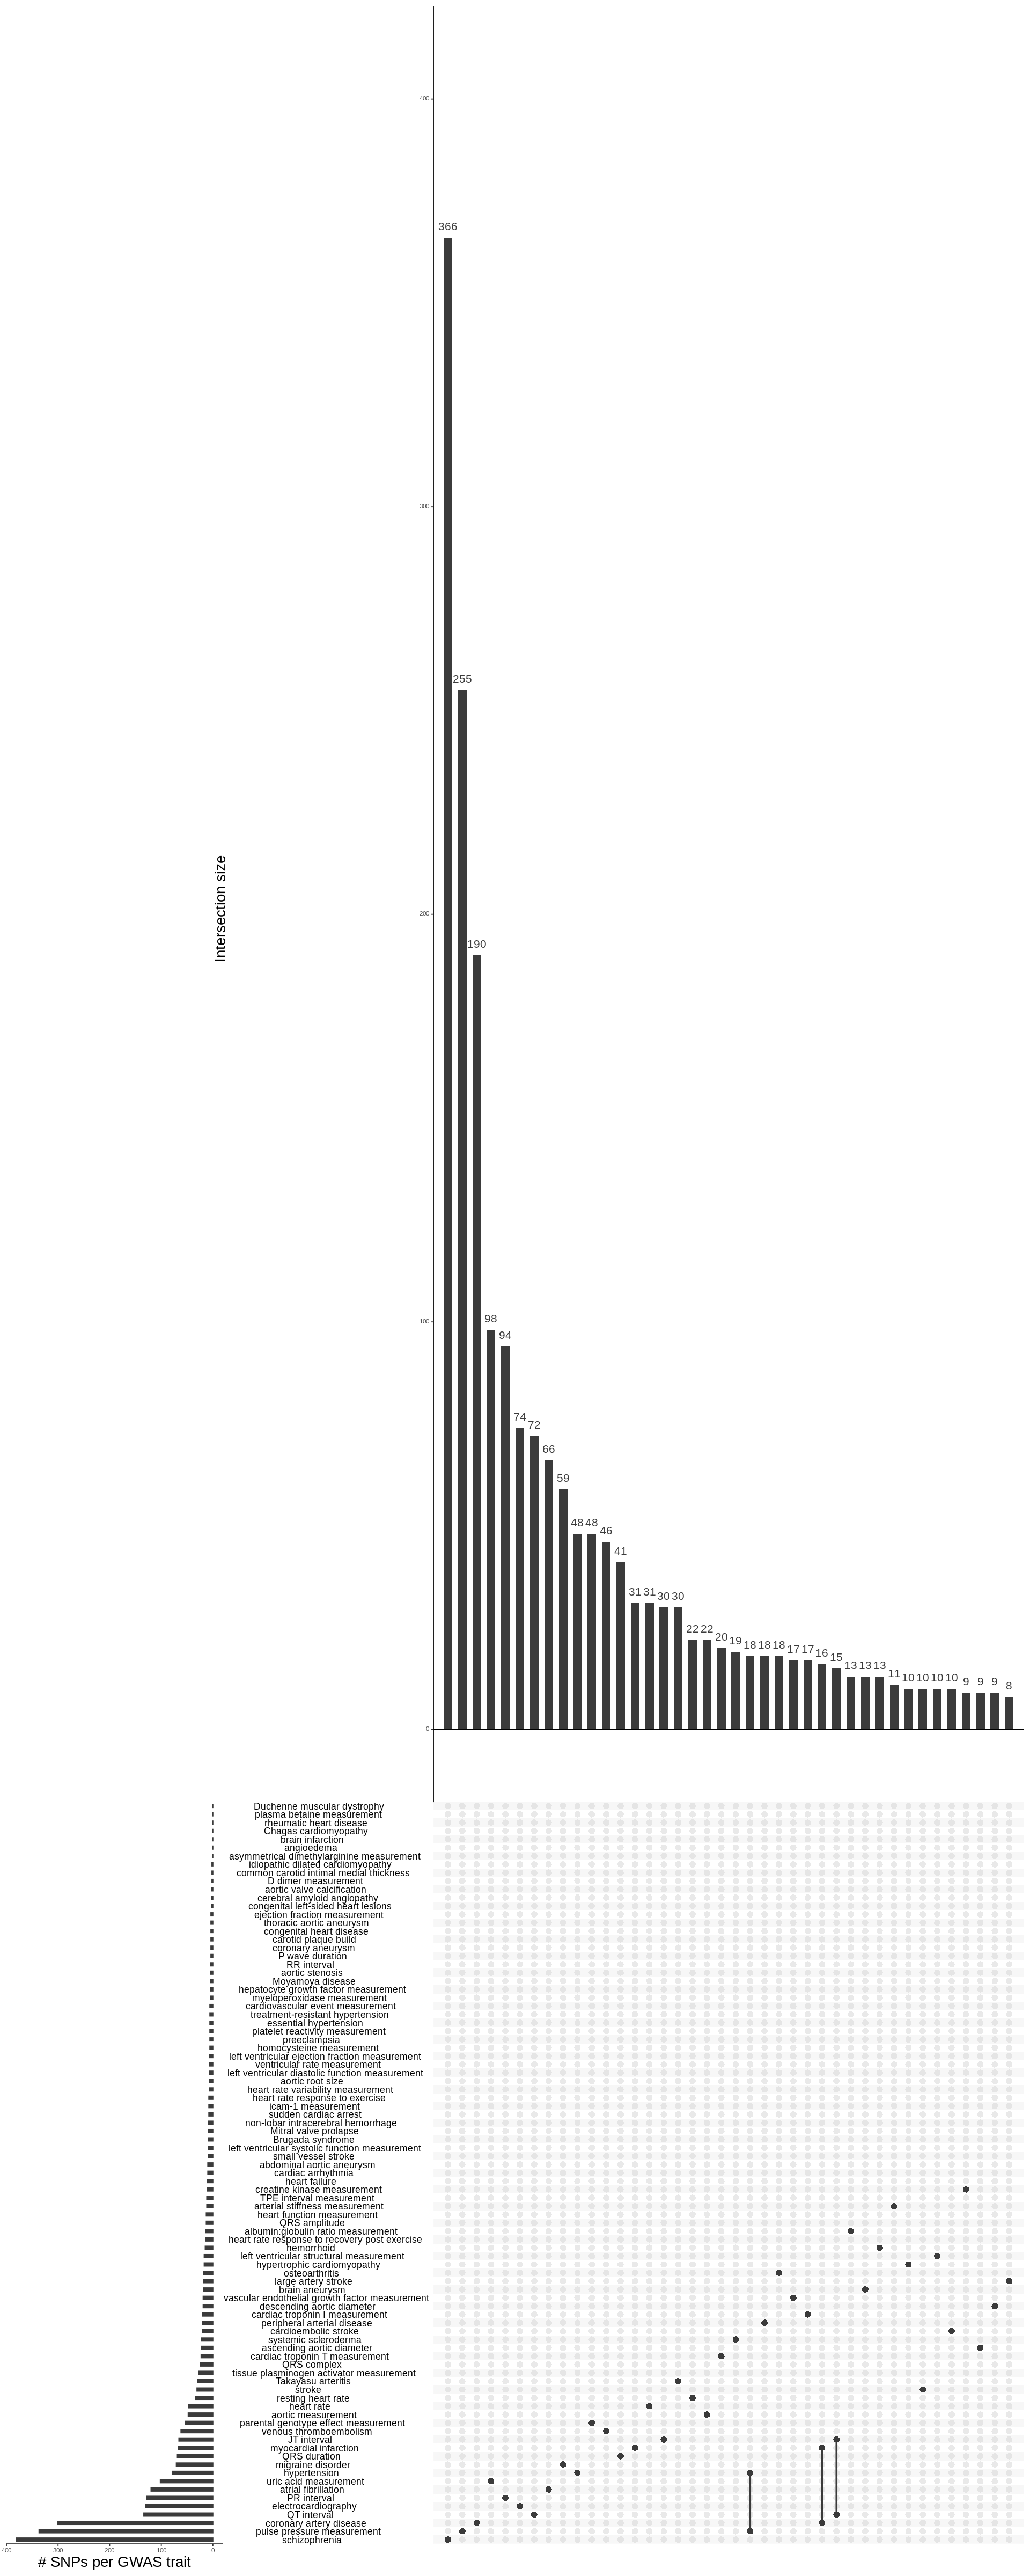

In [70]:
upset(df,
     order.by='freq',
     nsets=150,
         text.scale = c(2, 1, 2,1, 1.5, 2),
     mainbar.y.label = "Intersection size",
     sets.x.label = "# SNPs per GWAS trait",
  point.size = 3,
      line.size = 1)